In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
import xgboost as xgb
from sklearn.metrics import mean_squared_error   

In [5]:
 df = pd.read_csv('/content/BAJAJFINSV.csv')

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02,42.540649,42.545563,41.076778,41.268360,40.812237,186103.0
1,2012-01-03,41.779240,43.031879,41.479588,42.855038,42.381378,229911.0
2,2012-01-04,42.835388,43.110477,40.723091,41.096428,40.642204,290453.0
3,2012-01-05,42.240997,42.240997,41.317482,41.317482,40.860813,246869.0
4,2012-01-06,41.263447,42.344154,41.263447,41.440289,40.982262,326373.0


In [7]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2836,2023-06-23,1507.500000,1519.699951,1483.949951,1501.949951,1501.161011,1237464.0
2837,2023-06-26,1504.449951,1510.849976,1487.199951,1507.550049,1506.758179,647496.0
2838,2023-06-27,1512.000000,1527.349976,1503.000000,1522.949951,1522.149902,763062.0
2839,2023-06-29,NaN,NaN,NaN,NaN,NaN,NaN
2840,2023-06-30,1521.000000,1536.599976,1519.000000,1528.000000,1528.000000,934523.0


In [8]:
df.isnull().sum()

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02,42.540649,42.545563,41.076778,41.268360,40.812237,186103.0
1,2012-01-03,41.779240,43.031879,41.479588,42.855038,42.381378,229911.0
2,2012-01-04,42.835388,43.110477,40.723091,41.096428,40.642204,290453.0
3,2012-01-05,42.240997,42.240997,41.317482,41.317482,40.860813,246869.0
4,2012-01-06,41.263447,42.344154,41.263447,41.440289,40.982262,326373.0
...,...,...,...,...,...,...,...
2835,2023-06-22,1523.000000,1527.199951,1504.849976,1507.650024,1506.858032,966522.0
2836,2023-06-23,1507.500000,1519.699951,1483.949951,1501.949951,1501.161011,1237464.0
2837,2023-06-26,1504.449951,1510.849976,1487.199951,1507.550049,1506.758179,647496.0
2838,2023-06-27,1512.000000,1527.349976,1503.000000,1522.949951,1522.149902,763062.0


In [11]:
df_close = df.reset_index()['Close']

In [12]:
df_close

0         41.268360
1         42.855038
2         41.096428
3         41.317482
4         41.440289
           ...     
2829    1507.650024
2830    1501.949951
2831    1507.550049
2832    1522.949951
2833    1528.000000
Name: Close, Length: 2834, dtype: float64

In [13]:
df.drop(['Open','High','Low','Adj Close','Volume'], axis=1, inplace=True)

In [14]:
df.head()

,Date,Close
0,2012-01-02,41.268360
1,2012-01-03,42.855038
2,2012-01-04,41.096428
3,2012-01-05,41.317482
4,2012-01-06,41.440289


In [15]:
df = df.set_index('Date')

In [16]:
df.index

Index(['2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
       '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12', '2012-01-13',
       ...
       '2023-06-15', '2023-06-16', '2023-06-19', '2023-06-20', '2023-06-21',
       '2023-06-22', '2023-06-23', '2023-06-26', '2023-06-27', '2023-06-30'],
      dtype='object', name='Date', length=2834)

In [17]:
df.index = pd.to_datetime(df.index)

In [18]:
color_pal = sns.color_palette()

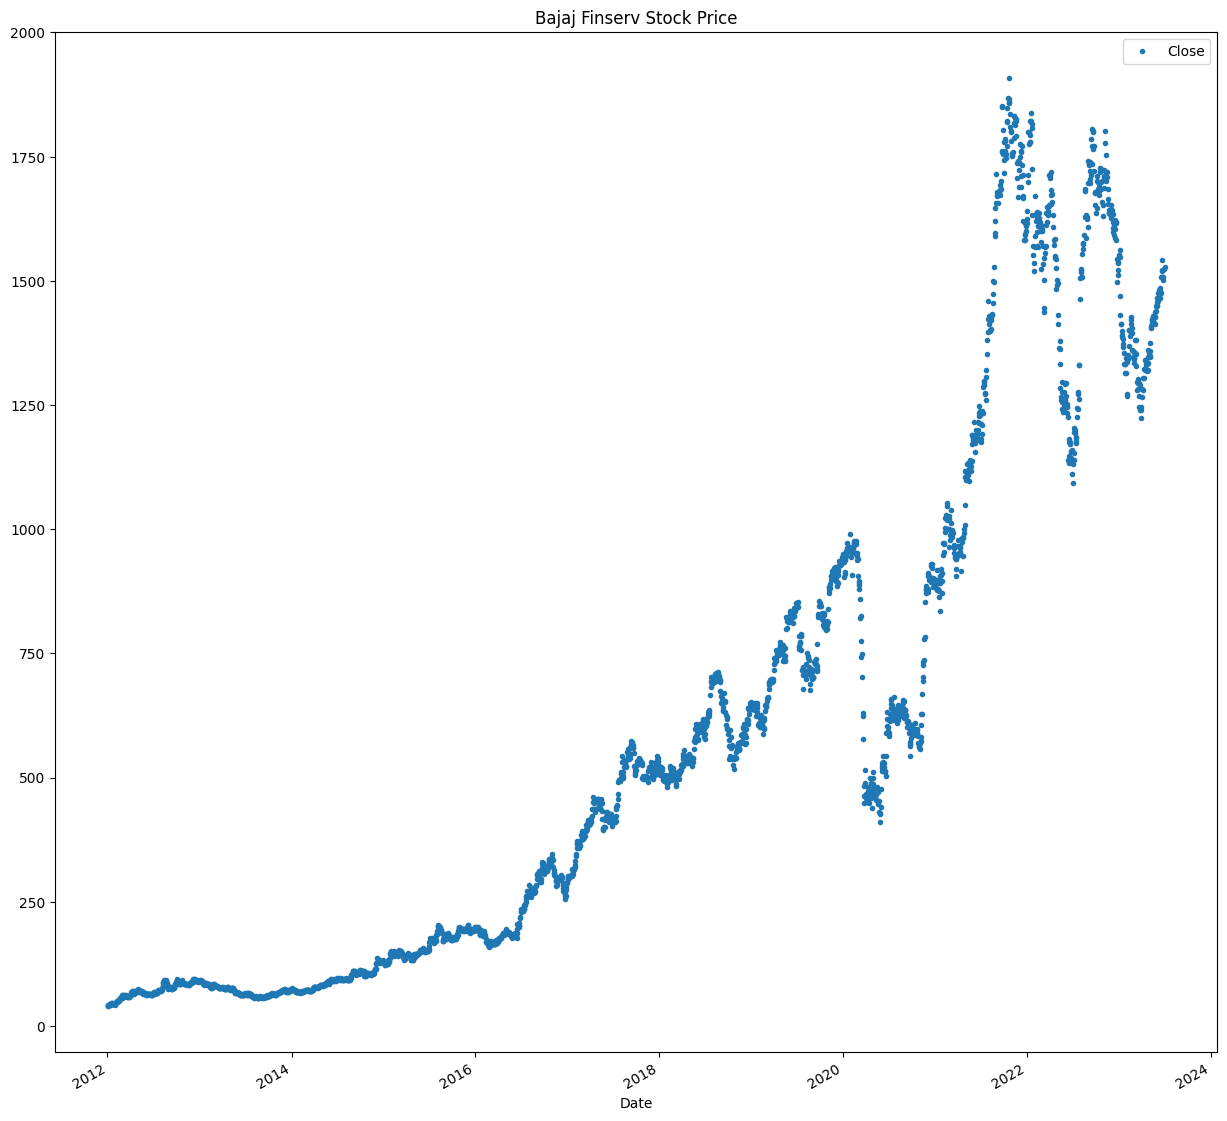

In [19]:
df.plot(style = '.', figsize = (15,15), color = color_pal[0], title = 'Bajaj Finserv Stock Price')
plt.show()


In [20]:
df.index

DatetimeIndex(['2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05',
               '2012-01-06', '2012-01-09', '2012-01-10', '2012-01-11',
               '2012-01-12', '2012-01-13',
               ...
               '2023-06-15', '2023-06-16', '2023-06-19', '2023-06-20',
               '2023-06-21', '2023-06-22', '2023-06-23', '2023-06-26',
               '2023-06-27', '2023-06-30'],
              dtype='datetime64[ns]', name='Date', length=2834, freq=None)

### Train/Test Split

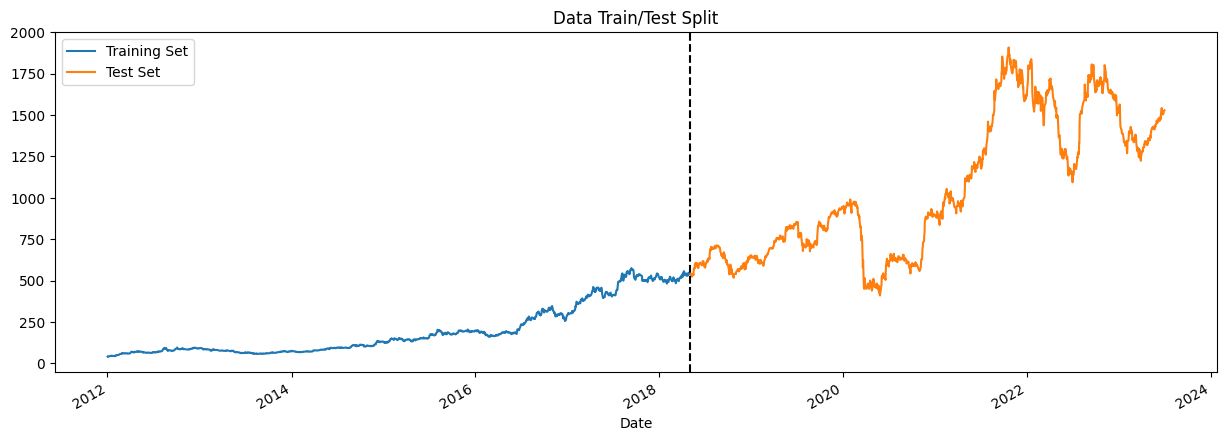

In [21]:
train = df.loc[df.index < '2018-05-04']
test = df.loc[df.index >= '2018-05-04']

fig, ax = plt.subplots(figsize = (15,5))
train.plot(ax = ax, label = 'Training Set', title = 'Data Train/Test Split')
test.plot(ax = ax, label = 'Test Set')
ax.axvline('2018-05-04', color = 'black', ls = '--')
ax.legend(['Training Set', 'Test Set'])

plt.show()

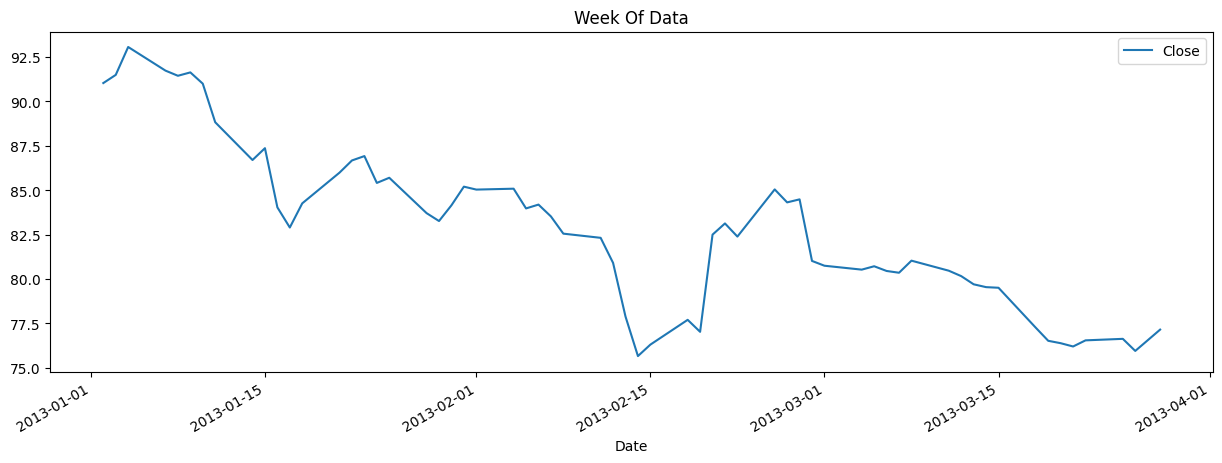

In [22]:
df.loc[(df.index > '01-01-2013') & (df.index < '04-01-2013')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

### Feature Creation

In [23]:
def create_features(df):
#Creates time series features based on time series index
  df = df.copy()
  df['dayofweek'] = df.index.dayofweek
  df['quarter'] = df.index.quarter
  df['month'] = df.index.month
  df['year'] = df.index.year
  df['dayofyear'] = df.index.dayofyear
  df['hour'] = df.index.hour
  return df


In [24]:
df = create_features(df)

### Visualise our Feature/Target Relationship

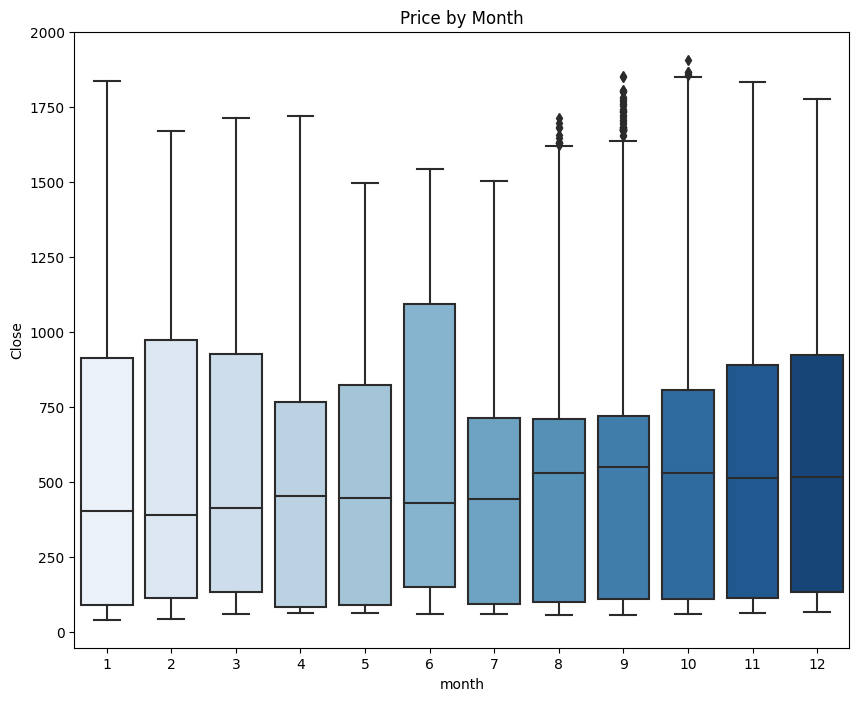

In [25]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='Close', palette='Blues')
ax.set_title('Price by Month')
plt.show()

In [26]:
train = create_features(train)
test = create_features(test)

In [27]:
features = ['Close', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'hour']
target = 'Close'

In [28]:
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

### Create our Model

In [29]:
df.columns

Index(['Close', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'hour'], dtype='object')

In [30]:
reg = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50, learning_rate = 0.01)
reg.fit(X_train, y_train,
        eval_set = [(X_train, y_train), (X_test, y_test)],
        verbose = 100) #prints training and validation score every 100 trees


[0]	validation_0-rmse:250.47020	validation_1-rmse:1125.92739
[100]	validation_0-rmse:92.77106	validation_1-rmse:831.48686
[200]	validation_0-rmse:34.44991	validation_1-rmse:720.02748
[300]	validation_0-rmse:12.83584	validation_1-rmse:674.32743
[400]	validation_0-rmse:4.80526	validation_1-rmse:654.67317
[500]	validation_0-rmse:1.81425	validation_1-rmse:645.68926
[600]	validation_0-rmse:0.69756	validation_1-rmse:641.23997
[700]	validation_0-rmse:0.27644	validation_1-rmse:638.86507
[800]	validation_0-rmse:0.11556	validation_1-rmse:637.60303
[900]	validation_0-rmse:0.05363	validation_1-rmse:636.94274
[999]	validation_0-rmse:0.02979	validation_1-rmse:636.53408


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### Feature Importance

In [31]:
reg.feature_importances_

#tells which of the features were more useful in the trees built by the XGB model

array([1.00000000e+00, 4.71260986e-09, 9.82215020e-09, 1.33251605e-08,
       0.00000000e+00, 3.87348242e-09, 0.00000000e+00], dtype=float32)

In [32]:
fi = pd.DataFrame(data = reg.feature_importances_,
             index = reg.feature_names_in_,
             columns = ['importance'],
             )

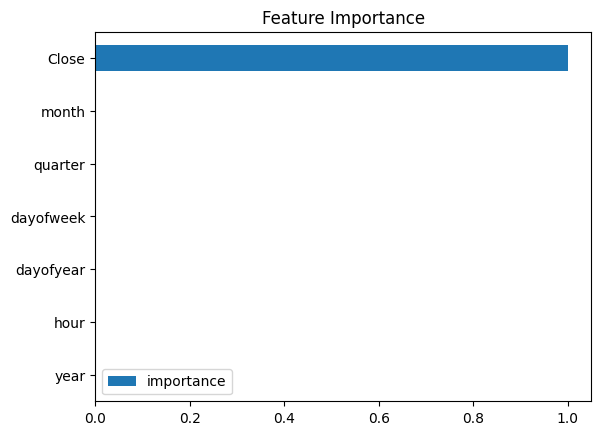

In [33]:
fi.sort_values('importance').plot(kind = 'barh', title = 'Feature Importance')
plt.show()

### Forecast on Test

In [34]:
reg.predict(X_test)

## predictions for the test set is given as a numpy array

array([535.10046, 540.17285, 533.89575, ..., 572.472  , 572.472  ,
       572.472  ], dtype=float32)

In [35]:
test['predictions'] = reg.predict(X_test)

In [36]:
df.merge(test[['predictions']], how = 'left', left_index = True, right_index = True) #meaning we will merge the datasets on the index column

,Close,dayofweek,quarter,month,year,dayofyear,hour,predictions
Date,,,,,,,,
2012-01-02,41.268360,0,1,1,2012,2,0,NaN
2012-01-03,42.855038,1,1,1,2012,3,0,NaN
2012-01-04,41.096428,2,1,1,2012,4,0,NaN
2012-01-05,41.317482,3,1,1,2012,5,0,NaN
2012-01-06,41.440289,4,1,1,2012,6,0,NaN
...,...,...,...,...,...,...,...,...
2023-06-22,1507.650024,3,2,6,2023,173,0,572.471985
2023-06-23,1501.949951,4,2,6,2023,174,0,572.471985
2023-06-26,1507.550049,0,2,6,2023,177,0,572.471985


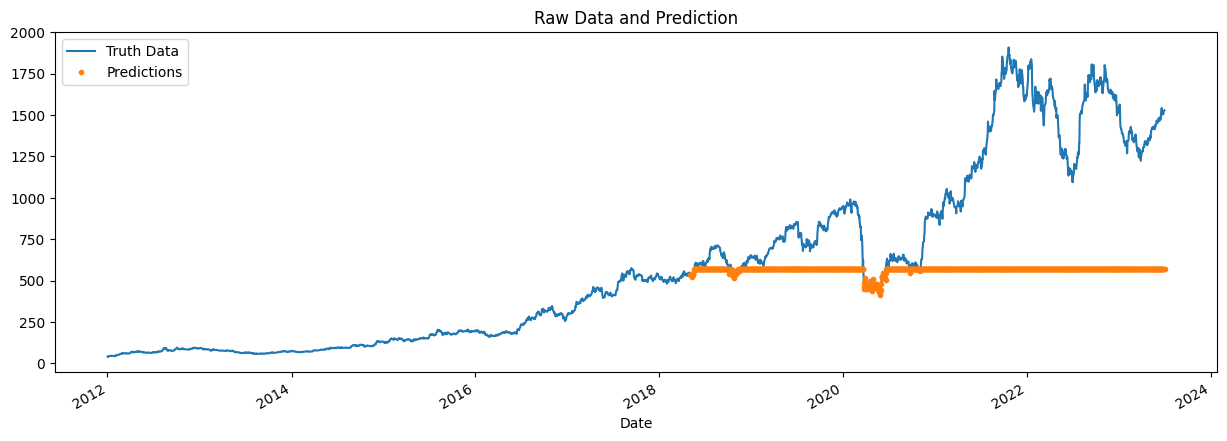

In [37]:
test['predictions'] = reg.predict(X_test)
df = df.merge(test[['predictions']], how='left', left_index=True, right_index=True)
ax = df[['Close']].plot(figsize=(15, 5))
df['predictions'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

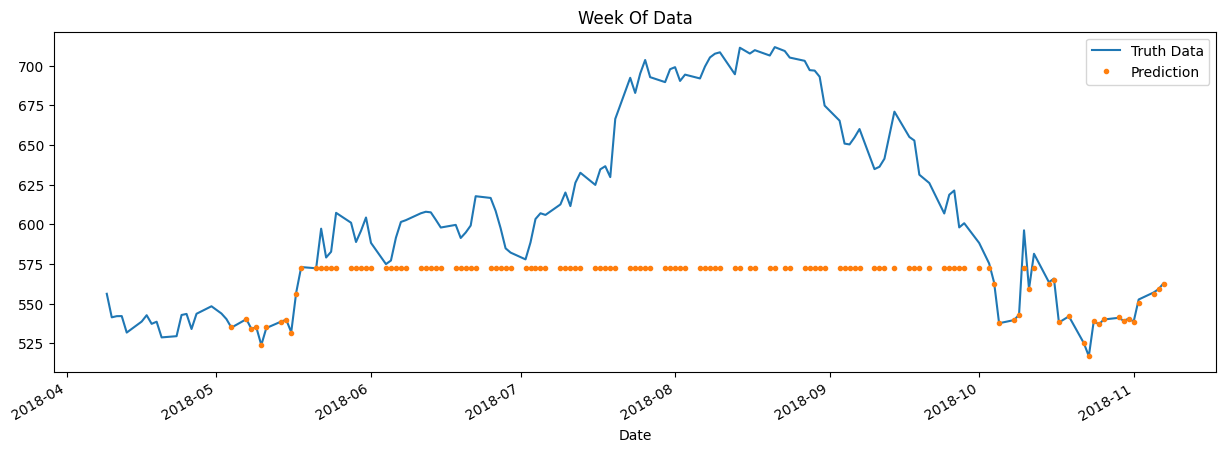

In [38]:
ax = df.loc[(df.index > '04-08-2018') & (df.index < '11-08-2018')]['Close'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '04-08-2018') & (df.index < '11-08-2018')]['predictions'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

In [ ]:
score = np.sqrt(mean_squared_error(test['Close'], test['predictions']))
print(f'RMSE Score on the Test Set: {score:0.2f}') #upto two decimal
#Gives the RMSE value

RMSE Score on the Test Set: 636.53


###MAPE Calculation

In [39]:
def mean_absolute_percentage_error(y_true, y_pred):
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [40]:
score = mean_absolute_percentage_error(test['Close'], test['predictions'])
print(f'MAPE Score on the Test Set: {score:0.2f}')

MAPE Score on the Test Set: 36.67


### Calculate Error

In [ ]:
test['error'] = np.abs(test[target] - test['predictions'])
#loss

In [ ]:
#to look at the best and worst predicted days
test['date'] = test.index.date

In [ ]:
test.groupby('date')['error'].mean().sort_values(ascending = False).head(5)
#worst predictions were in october 2021

date
2021-10-19    1335.183044
2021-10-18    1295.323059
2021-10-22    1293.342956
2021-10-20    1287.847961
2021-10-21    1285.487976
Name: error, dtype: float64

In [ ]:
 test.groupby('date')['error'].mean().sort_values(ascending = True).head(5)
 #best predictions were in 2020

date
2018-10-08    0.002990
2020-06-03    0.003174
2020-09-24    0.006897
2020-06-12    0.013183
2018-11-14    0.019654
Name: error, dtype: float64

### Next Steps


*   More Robust Cross Validation
*   Add more features



In [ ]:
df.head()

,Close,dayofweek,quarter,month,year,dayofyear,hour,predictions
Date,,,,,,,,
2012-01-02,41.268360,0,1,1,2012,2,0,NaN
2012-01-03,42.855038,1,1,1,2012,3,0,NaN
2012-01-04,41.096428,2,1,1,2012,4,0,NaN
2012-01-05,41.317482,3,1,1,2012,5,0,NaN
2012-01-06,41.440289,4,1,1,2012,6,0,NaN


In [ ]:
df.drop(['hour'], axis=1, inplace=True)

In [ ]:
df.head()

,Close,dayofweek,quarter,month,year,dayofyear,predictions
Date,,,,,,,
2012-01-02,41.268360,0,1,1,2012,2,NaN
2012-01-03,42.855038,1,1,1,2012,3,NaN
2012-01-04,41.096428,2,1,1,2012,4,NaN
2012-01-05,41.317482,3,1,1,2012,5,NaN
2012-01-06,41.440289,4,1,1,2012,6,NaN


In [ ]:
df_plot = pd.read_csv('/content/BAJAJFINSV.csv')
df_plot.drop(['Open','High','Low','Adj Close','Volume'], axis=1, inplace=True)
df_plot = df_plot.set_index('Date')
df_plot.index = pd.to_datetime(df_plot.index)

In [ ]:
df_plot.head()

,Close
Date,
2012-01-02,41.268360
2012-01-03,42.855038
2012-01-04,41.096428
2012-01-05,41.317482
2012-01-06,41.440289


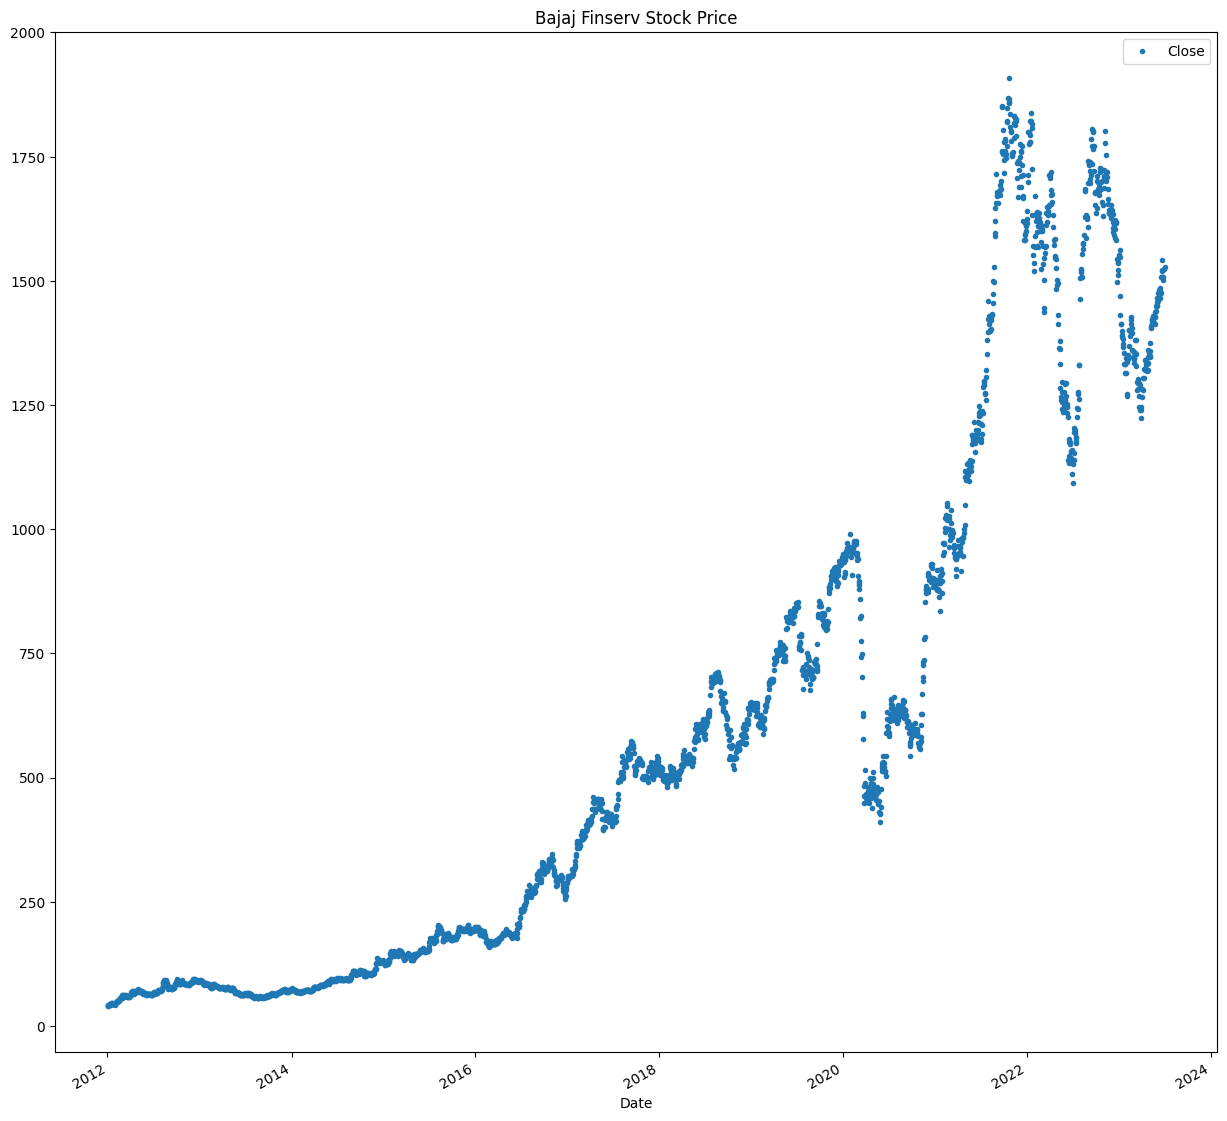

In [ ]:
df_plot.plot(style = '.',
             figsize = (15,15),
             color = color_pal[0],
             title = 'Bajaj Finserv Stock Price')
plt.show()

<Axes: ylabel='Frequency'>

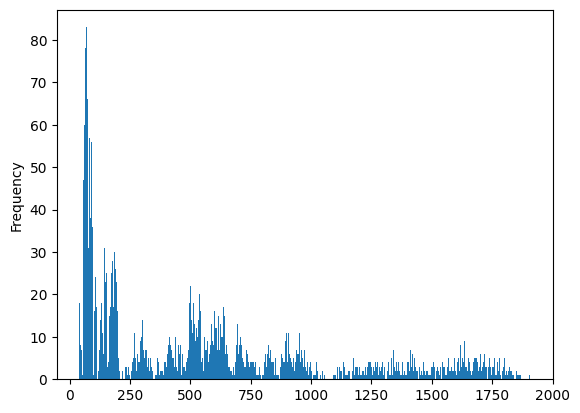

In [ ]:
df_plot['Close'].plot(kind = 'hist', bins = 500)

### Time Series Cross Validation

In [ ]:
 from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
tss = TimeSeriesSplit(n_splits = 5, test_size = 365, gap = 1)
df = df.sort_index()

In [ ]:
tss

TimeSeriesSplit(gap=1, max_train_size=None, n_splits=5, test_size=365)

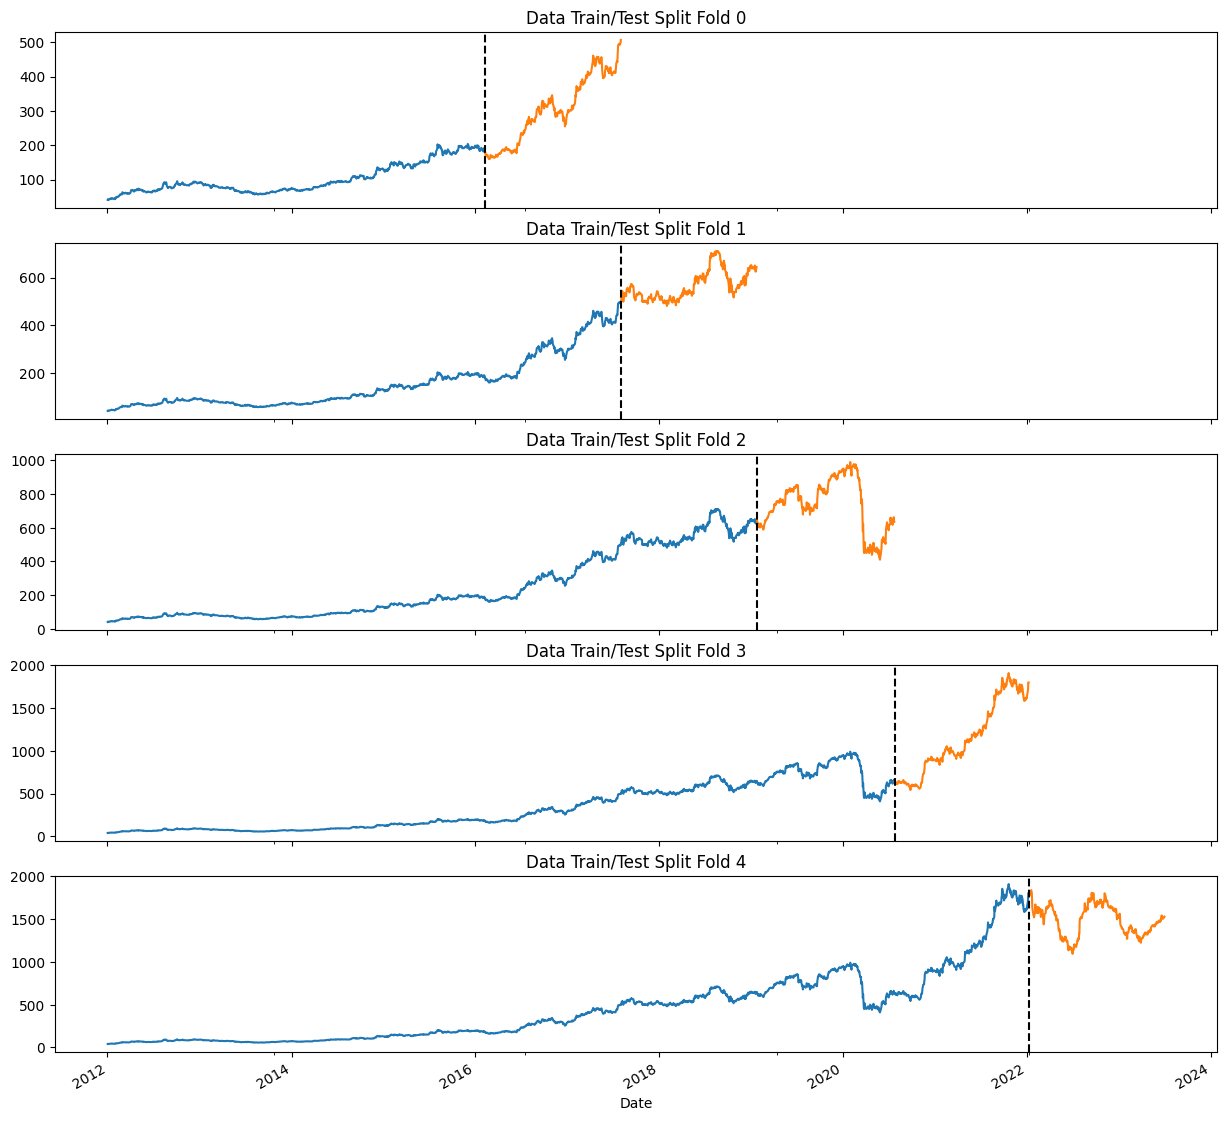

In [ ]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)
fold = 0
for train_idx, val_idx in tss.split(df):
  train = df.iloc[train_idx]
  test = df.iloc[val_idx]
  train['Close'].plot(ax=axs[fold],
                        label='Training Set',
                        title=f'Data Train/Test Split Fold {fold}')
  test['Close'].plot(ax=axs[fold],
                        label='Test Set')
  axs[fold].axvline(test.index.min(), color='black', ls='--')
  fold += 1


### Forecasting Horizon

The forecast horizon is the length of time into the future for which forecasts are to be prepared. These generally vary from short-term forecasting horizons(less than thre months) to long-term horizons(more than two years)

In [ ]:
target_map = df['Close'].to_dict()

In [ ]:
def add_lags(df):
  df['lag 1'] = (df.index - pd.Timedelta('364 days')).map(target_map)
  df['lag 2'] = (df.index - pd.Timedelta('728 days')).map(target_map)
  df['lag 3'] = (df.index - pd.Timedelta('1092 days')).map(target_map)
  return df;

In [ ]:
df = add_lags(df)

In [ ]:
df.columns

Index(['Close', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'predictions', 'lag 1', 'lag 2', 'lag 3'],
      dtype='object')

In [ ]:
tss = TimeSeriesSplit(n_splits=5, test_size=365, gap=1)
df = df.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    train = create_features(train)
    test = create_features(test)

    FEATURES = ['dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'predictions', 'lag 1', 'lag 2', 'lag 3']
    TARGET = 'Close'

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[12:43:44] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:109.24686	validation_1-rmse:317.78418
[100]	validation_0-rmse:41.33711	validation_1-rmse:216.86926
[200]	validation_0-rmse:16.79713	validation_1-rmse:182.69578
[300]	validation_0-rmse:8.45287	validation_1-rmse:170.38741
[400]	validation_0-rmse:5.78212	validation_1-rmse:165.77353
[500]	validation_0-rmse:4.81986	validation_1-rmse:164.35388
[600]	validation_0-rmse:4.37225	validation_1-rmse:163.77920
[700]	validation_0-rmse:3.98107	validation_1-rmse:163.61804
[800]	validation_0-rmse:3.70898	validation_1-rmse:163.53109
[822]	validation_0-rmse:3.66844	validation_1-rmse:163.57667
[12:43:46] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:187.59439	validation_1-rmse:564.16443
[100]	validation_0-rmse:71.28807	validation_1-rmse:312.21631
[200]	validation_0-rmse:29.19514	valida

In [ ]:
scores

[163.44477552610826,
 115.69623838209392,
 180.66167208918947,
 571.2945306547077,
 159.87757542130646]

In [ ]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 238.1950
Fold scores:[163.44477552610826, 115.69623838209392, 180.66167208918947, 571.2945306547077, 159.87757542130646]


### Predicting the Future

In [ ]:
# Retrain on all data
df = create_features(df)

FEATURES = ['dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'predictions', 'lag 1', 'lag 2', 'lag 3']
TARGET = 'Close'

X_all = df[FEATURES]
y_all = df[TARGET]

reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',
                       n_estimators=800, #as overfitting starts at 800th iteration
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=100)

[12:47:24] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:773.33463
[100]	validation_0-rmse:295.96456
[200]	validation_0-rmse:130.68171
[300]	validation_0-rmse:76.54468
[400]	validation_0-rmse:55.95809
[500]	validation_0-rmse:47.37388
[600]	validation_0-rmse:42.92079
[700]	validation_0-rmse:40.12774
[799]	validation_0-rmse:37.93936


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=800, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [ ]:
df.index.max()

Timestamp('2023-06-30 00:00:00')

In [ ]:

future

DatetimeIndex(['2023-06-30', '2023-07-01', '2023-07-02', '2023-07-03',
               '2023-07-04', '2023-07-05', '2023-07-06', '2023-07-07',
               '2023-07-08', '2023-07-09',
               ...
               '2024-07-23', '2024-07-24', '2024-07-25', '2024-07-26',
               '2024-07-27', '2024-07-28', '2024-07-29', '2024-07-30',
               '2024-07-31', '2024-08-01'],
              dtype='datetime64[ns]', length=399, freq='D')

In [ ]:
# Create future dataframe
future = pd.date_range('2023-06-30','2023-08-01', freq='1d')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df['isFuture'] = False
df_and_future = pd.concat([df, future_df])
df_and_future = create_features(df_and_future)
df_and_future = add_lags(df_and_future)

In [ ]:
future_w_features = df_and_future.query('isFuture').copy()

In [ ]:
future_w_features

,Close,dayofweek,quarter,month,year,dayofyear,predictions,lag 1,lag 2,lag 3,hour,isFuture
2023-06-30,NaN,4,2,6,2023,181,NaN,1132.255005,1175.045044,614.940002,0,True
2023-07-01,NaN,5,3,7,2023,182,NaN,NaN,NaN,NaN,0,True
2023-07-02,NaN,6,3,7,2023,183,NaN,NaN,NaN,NaN,0,True
2023-07-03,NaN,0,3,7,2023,184,NaN,1138.829956,1192.310059,628.500000,0,True
2023-07-04,NaN,1,3,7,2023,185,NaN,1152.469971,1209.079956,658.960022,0,True
2023-07-05,NaN,2,3,7,2023,186,NaN,1202.849976,1237.415039,640.539978,0,True
2023-07-06,NaN,3,3,7,2023,187,NaN,1196.734985,1233.390015,656.919983,0,True
2023-07-07,NaN,4,3,7,2023,188,NaN,1200.310059,1285.474976,648.380005,0,True
2023-07-08,NaN,5,3,7,2023,189,NaN,NaN,NaN,NaN,0,True
2023-07-09,NaN,6,3,7,2023,190,NaN,NaN,NaN,NaN,0,True


### Predict the Future

In [ ]:
future_w_features['pred'] = reg.predict(future_w_features[FEATURES])

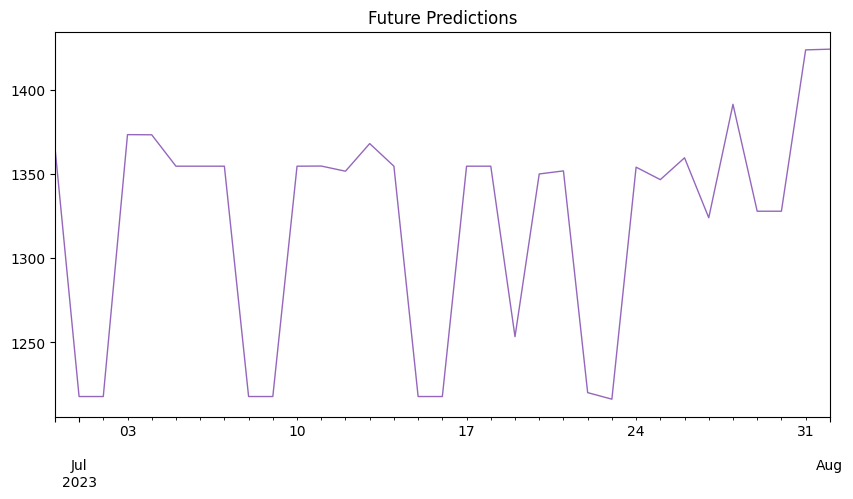

In [ ]:
future_w_features['pred'].plot(figsize=(10, 5),
                               color=color_pal[4],
                               ms=1,
                               lw=1,
                               title='Future Predictions')
plt.show()


In [ ]:
# Save model
reg.save_model('model.json')

In [ ]:
!ls -lh

total 1.1M
-rw-r--r-- 1 root root 204K Jul  4 12:02 BAJAJFINSV.csv
-rw-r--r-- 1 root root 882K Jul  4 12:52 model.json
drwxr-xr-x 1 root root 4.0K Jun 29 13:30 sample_data


<Axes: title={'center': 'Future Predictions'}>

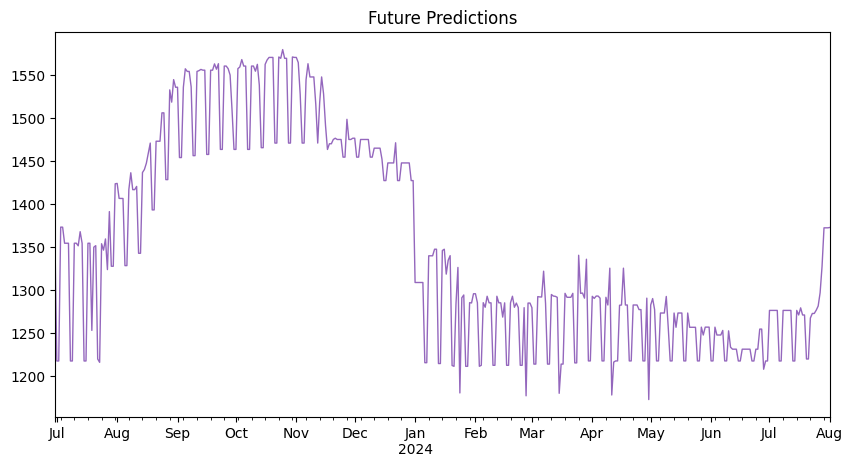

In [ ]:
reg_new = xgb.XGBRegressor()
reg_new.load_model('model.json')
future_w_features['pred'] = reg_new.predict(future_w_features[FEATURES])
future_w_features['pred'].plot(figsize=(10, 5),
                               color=color_pal[4],
                               ms=1, lw=1,
                               title='Future Predictions')